In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets, model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [20]:
### Iris dataset preprocessing
# Load Iris dataset:
iris = datasets.load_iris()
# Store the first 2 features in a matrix X:
X = iris.data[:, :2] #[0,3]
# Store the labels in a vector Y:
Y = iris.target
# Split the data into train and validation sets with a ratio of 0.7/0.3:

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.3, random_state = 0)
# X[0:round(X.shape[0]*.7),:],\
# X[round(X.shape[0]*.7)+1:X.shape[0],:],\
# Y[0:round(X.shape[0]*.7)],\
# Y[round(X.shape[0]*.7)+1:X.shape[0]]
# Store number of datapoints in train and validation sets:
N_train = len(Y_train)
N_val = len(Y_val)

In [21]:
### Plot parameters:
# Step size in the mesh:
h = .02
# Light colors for decision boundaries plots:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
# Bold colors for training points scatterplots:
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

### k-NN parameters: 
# k: Number of nearest neighbors taken into account:
k_list = [1, 5, 10, 20, 30]

Train accuracy for every K: 0.9428571428571428 0.819047619047619 0.8380952380952381 0.8 0.819047619047619
Validation accuracy for every K: 0.6666666666666666 0.7333333333333333 0.7333333333333333 0.8 0.7777777777777778


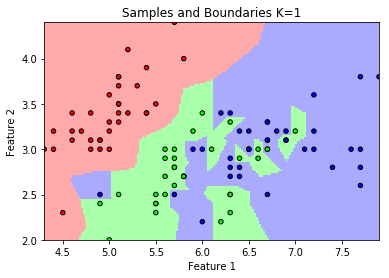

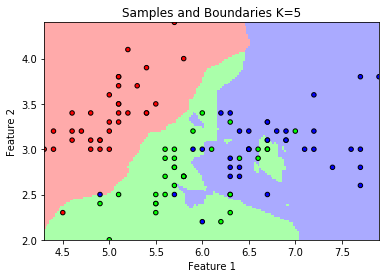

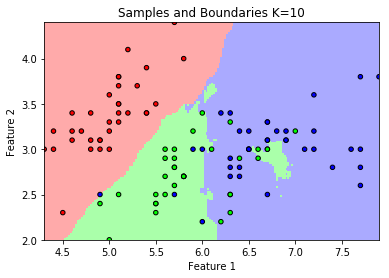

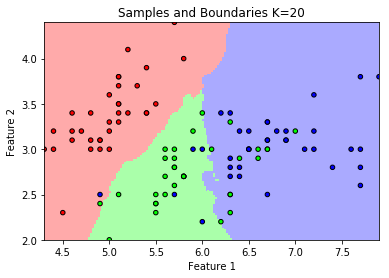

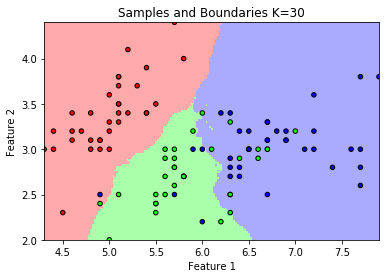

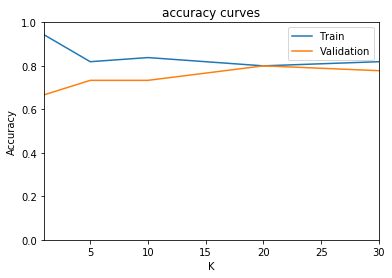

In [32]:
### k-NN on the Iris dataset for different values of k:
# Create vectors to store the results for each k:
train_accuracies = []
val_accuracies = []

# Main work here:
for idx, k in enumerate(k_list):
	# Create an instance of the KNeighborsClassifier class for current value of k:
	neigh = KNeighborsClassifier(n_neighbors=k)
	# Fit the train data:
	neigh.fit(X_train, Y_train)

	### Decision boundaries plotting:
	# Generate the axis associated to the first feature: 
	x_min = np.amin(X[:,0])
	x_max = np.amax(X[:,0])
	x_axis = np.arange(x_min, x_max, h)
	# Generate the axis associated to the second feature:
	y_min = np.amin(X[:,1])
	y_max = np.amax(X[:,1])
	y_axis = np.arange(y_min, y_max, h)
	# Generate a meshgrid (2D grid) from the 2 axis:
	x_grid, y_grid = np.meshgrid(x_axis, y_axis)
	# Vectorize the grids into column vectors:
	x_grid_vectorized = x_grid.flatten()
	x_grid_vectorized = np.expand_dims(x_grid_vectorized, axis=1)
	y_grid_vectorized = y_grid.flatten()
	y_grid_vectorized = np.expand_dims(y_grid_vectorized, axis=1)
	# Concatenate the vectorized grids:
	concat_grids = np.concatenate((x_grid_vectorized, y_grid_vectorized),
								  axis=1)
	# Predict concatenated features to get the decision boundaries:
	decision_boundaries = neigh.predict(np.c_[x_grid.ravel(), y_grid.ravel()])
	# Reshape the decision boundaries into a 2D matrix:
	decision_boundaries = decision_boundaries.reshape(x_grid.shape)
	# Plot the decision boundaries:
	plt.figure(idx)
	plt.pcolormesh(x_grid, y_grid, decision_boundaries, cmap=cmap_light)
	# Overlay the training points:
	plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=cmap_bold, edgecolor='k', s=20)
	plt.xlim(np.amin(X[:,0]),np.amax(X[:,0]))
	plt.ylim(np.amin(X[:,1]),np.amax(X[:,1]))
	plt.xlabel("Feature 1")
	plt.ylabel("Feature 2")
	plt.title('Samples and Boundaries K=%i' %k)

	### Model evaluation:
	# Evaluate train set:
#     accuracy_score(Y_train,neigh.predict(X_train))
	train_accuracies.append(accuracy_score(Y_train,neigh.predict(X_train)))
	# Evaluate validation set:
#     accuracy_score(Y_val,neigh.predict(X_val))
	val_accuracies.append(accuracy_score(Y_val,neigh.predict(X_val)))

print("Train accuracy for every K:",*train_accuracies)
print("Validation accuracy for every K:",*val_accuracies)
# Plot accuracy curves:
plt.figure(len(k_list))
plt.plot(k_list,train_accuracies) # train accuracy plot
plt.plot(k_list,val_accuracies) # validation accuracy plot
plt.xlim(np.amin(k_list),np.amax(k_list))
plt.ylim(0,1)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(['Train', 'Validation'], loc='best')
plt.title("accuracy curves")

# Display plots:
plt.show()